In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import time
import matplotlib 
import datetime
matplotlib.rc_file_defaults()
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
params = {'xtick.labelsize': 10, 'ytick.labelsize': 10}
matplotlib.rcParams.update(params)
pd.set_option('display.max_columns', None)

In [2]:
# Cargamos los datos
file = "Informacion Puerto Angamos-Revisado-Fechas 2020-2022.xlsx"
df = pd.read_excel(file)
df.shape

(7233, 39)

In [3]:
#  & df["Hora Legada a Espera"].notna()
df_ss = df[df["Producto"].notna() & df["Hora Ingreso a Puerto"].notna()]
df_ss.shape

(6487, 39)

In [4]:
df_ss.columns

Index(['Flota', 'Patente', 'Tipo', 'N Guia', 'Fecha', 'Producto', 'Viaje',
       'Origen', 'Origen inicio', 'Origen salida', 'Destino',
       'Destino termino', 'Hora Legada a Espera', 'Tiempo Espera [minutos]',
       'Hora Ingreso a Puerto', 'Tiempo Total en Puerto',
       'Tiempo total Descarga', 'Nombre Cancha', 'Nombre Geo Espera Exterior',
       'Fecha Guía', 'Hora Guía', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31',
       'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35',
       'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38'],
      dtype='object')

In [5]:
df_ss["Producto"].unique()

array(['NPC-R SOLAR', 'NPC-R SOLAR | NPC-R SOLAR',
       'NPC-R SOLAR | NPC-R SOLAR | NPC-R SOLAR | NPC-R SOLAR | NPC-R SOLAR | NPC-R SOLAR | NPC-R SOLAR',
       'NPC-R SOLAR | NPC-R SOLAR | NPC-R SOLAR', 'SSR-C',
       'SSR-C | SSR-C', 'QROP-KS', 'ULTRASOL NKS',
       'SSR-C | SSR-C | SSR-C', 'LSI (S)', 'LSI (S) | LSI (S)'],
      dtype=object)

In [6]:
cols = ["Producto",'Hora Legada a Espera', 'Tiempo Espera [minutos]',
       'Hora Ingreso a Puerto', 'Tiempo Total en Puerto']

In [7]:
df_ss = df_ss[cols]

In [9]:
df_ss = df_ss[(df_ss["Producto"].str.contains("SSR")) | (df_ss["Producto"].str.contains("NPC"))]

In [11]:
df_ss[df_ss["Tiempo Espera [minutos]"].notna()].shape[0], df_ss.shape[0]

(5684, 5684)

In [12]:
df_ss["Producto"].unique()

array(['NPC-R SOLAR', 'NPC-R SOLAR | NPC-R SOLAR',
       'NPC-R SOLAR | NPC-R SOLAR | NPC-R SOLAR | NPC-R SOLAR | NPC-R SOLAR | NPC-R SOLAR | NPC-R SOLAR',
       'NPC-R SOLAR | NPC-R SOLAR | NPC-R SOLAR', 'SSR-C',
       'SSR-C | SSR-C', 'SSR-C | SSR-C | SSR-C'], dtype=object)

### 1 - Distribucion Tiempos de Descarga

In [149]:
pdf = []
ranges = [0, 15, 30, 45, 60, 75, 90, 120, 180, 240, 300, 360, 600, 1200, 1800]
for i in range(1,len(ranges)):
    pdf.append(df_ss[(df_ss["Tiempo Total en Puerto"] > ranges[i-1]) & (df_ss["Tiempo Total en Puerto"] <= ranges[i])].shape[0])
    
pdf = np.array(pdf)
pdf

array([  22,  645,  949, 1012,  783,  570,  726,  625,  146,   50,   21,
         19,   99,   17])

In [150]:
tot = pdf.sum()
perc = 100*np.array(pdf)/tot
tot

5684

In [151]:
rangos_str = [str(vali) + "-" + str(ranges[i+1]) for i, vali in enumerate(ranges[:8])]

In [152]:
rangos_str = rangos_str + ["180-4h", "4h-5h", "5h-6h", "6h-10h", "10h-20h", "20h-30h"]

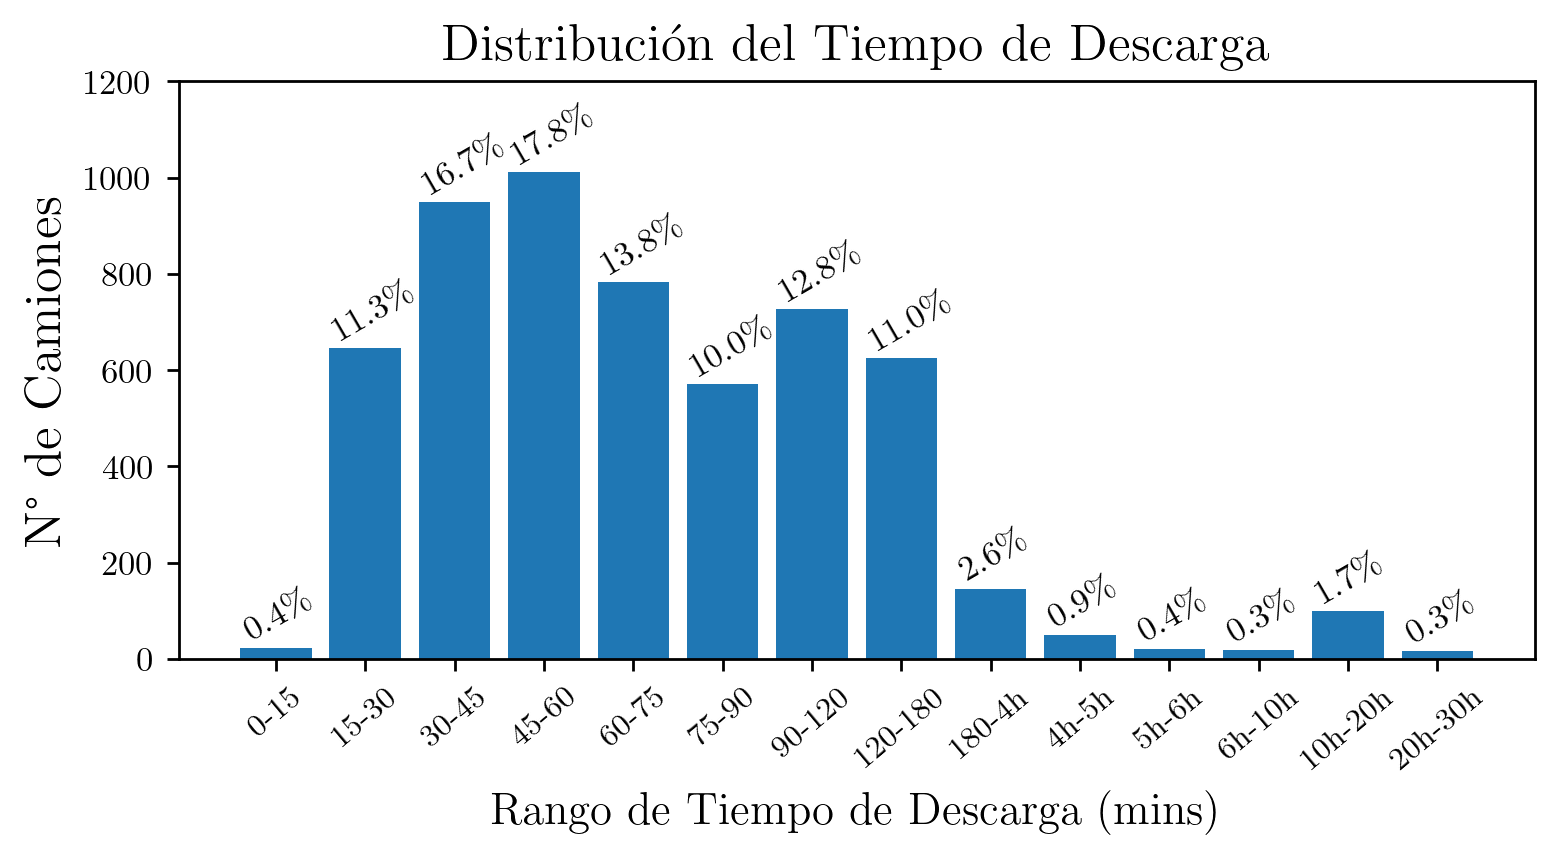

In [153]:
fig = plt.figure(figsize=(7,3), dpi = 250)

ax1 = fig.add_subplot(111)

ax1.set_title("Distribución del Tiempo de Descarga", fontsize = 15)
ax1.set_ylabel("N° de Camiones", fontsize = 15)
ax1.set_xlabel("Rango de Tiempo de Descarga (mins)", fontsize = 13)
ax1.bar(rangos_str, pdf, label = "Viajes")
ax1.set_ylim([0,1200])
ax1.set_xticks(rangos_str)
ax1.set_xticklabels(rangos_str, rotation = 40, fontsize = 9)


for i, label in enumerate(perc):
    plt.annotate(str(round(label,1))+"\%", (i-0.4, pdf[i]+17.), rotation = 30)

plt.savefig("Graficos/Distribucion Tiempo en Puerto.png", bbox_inches= "tight") 

In [155]:
perc[4:].sum()

53.7649542575651

### 2 - Camiones por Turno

In [66]:
df_ss["Hora Ingreso a Puerto"] = pd.to_datetime(df_ss["Hora Ingreso a Puerto"])

In [67]:
t1 = datetime.time(0,0,0)
t2 = datetime.time(8,30,0)
t3 = datetime.time(10,0,0)
t4 = datetime.time(12,0,0)
t5 = datetime.time(14,0,0)
t6 = datetime.time(15,30,0)
t7 = datetime.time(17,0,0)
t8 = datetime.time(19,0,0)
t9 = datetime.time(21,0,0)
t10 = datetime.time(22,30,0)
t11 = datetime.time(23,59,59)


T = np.array([t2, t3, t4, t5, t6, t7, t8, t9, t10, t11])


turnos = np.array(["Pre", "T1A", "T1B", "T1C", "Almuerzo",
          "T2A", "T2B", "T2C", "T2D", "Post"])

In [68]:
def Turno(t):
    for idx, val in enumerate(T):
        if t.time() < val:
            return turnos[idx]

In [69]:
df_ss["Turno en Puerto"] = df_ss["Hora Ingreso a Puerto"].apply(lambda x: Turno(x))

In [70]:
df_ss.head(3)

,Producto,Hora Legada a Espera,Tiempo Espera [minutos],Hora Ingreso a Puerto,Tiempo Total en Puerto,Turno en Puerto
0,NPC-R SOLAR,20200115 20:49:19,884.350000,2020-01-16 11:33:40,51.150000,T1B
1,NPC-R SOLAR,20200115 20:35:57,891.466667,2020-01-16 11:27:25,34.433333,T1B
2,NPC-R SOLAR,20200115 20:50:52,884.416667,2020-01-16 11:35:17,70.983333,T1B


In [71]:
N_turnos = np.array([df_ss[df_ss["Turno en Puerto"] == i].shape[0] for i in turnos])
N_turnos

array([ 146,  828, 1143,  696,  475,  656,  810,  746,  181,    3])

In [72]:
T_turnos = np.array([df_ss["Tiempo Total en Puerto"][df_ss["Turno en Puerto"] == i].mean() for i in turnos])
T_turnos

array([ 78.18778539,  73.7328905 ,  87.85958005,  97.72624521,
       119.14950877,  78.46643801,  82.74024691, 118.85417784,
       160.69069982,  22.16111111])

In [73]:
T_ponderado = (N_turnos*T_turnos).sum()/N_turnos.sum()
T_ponderado

93.91511846117862

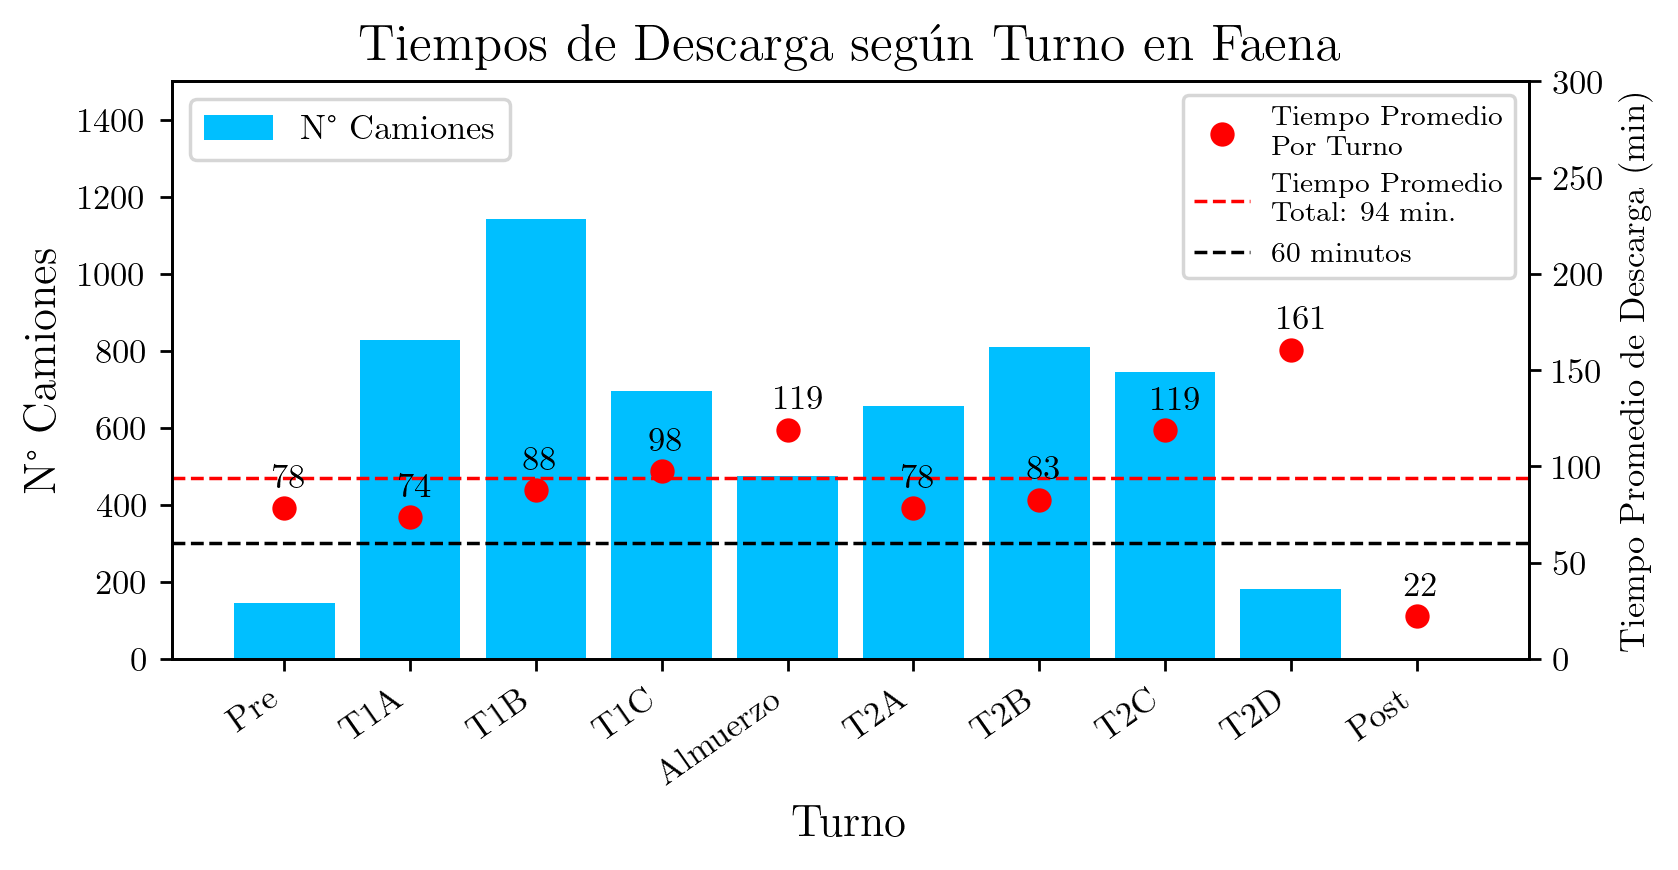

In [74]:
fig = plt.figure(figsize=(7,3), dpi = 250)

ax1 = fig.add_subplot(111)

ax1.bar(turnos, N_turnos, label = "N° Camiones", color = "deepskyblue")
ax1.set_ylim([0,1500])
ax1.set_ylabel("N° Camiones", fontsize = 13)
ax1.set_xlabel("Turno", fontsize = 13)
ax1.legend(loc = "upper left")
ax1.set_xticks(turnos)
ax1.set_xticklabels(turnos, rotation = 35, fontsize = 10, 
                    fontdict = {"horizontalalignment": "right"})


ax2 = ax1.twinx() 

ax2.plot(turnos, T_turnos, "ro", label = "Tiempo Promedio \n Por Turno")
ax2.set_title("Tiempos de Descarga según Turno en Faena", fontsize = 15)
ax2.set_ylabel("Tiempo Promedio de Descarga (min)")
ax2.axhline(y = T_ponderado, c = "r", 
                linestyle = "--", linewidth = 1, 
            label = "Tiempo Promedio \n Total: "+ str(round(T_ponderado)) + " min.")
ax2.axhline(y = 60., c = "k", 
                linestyle = "--", linewidth = 1, label = "60 minutos")

ax2.set_ylim([0,300])
ax2.legend(fontsize = 8, loc = "upper right")



for i, label in enumerate(T_turnos):
    plt.annotate(str(round(label)), (i-0.1, T_turnos[i]+10.7))


plt.savefig("Graficos/Tiempos de Descarga por Turno.png", bbox_inches= "tight")

In [75]:
N_turnos2 = np.array([df_ss[df_ss["Turno en Puerto"] == i].shape[0] for i in turnos])
N_turnos2

array([ 146,  828, 1143,  696,  475,  656,  810,  746,  181,    3])

### 3 - Tiempos de Descarga por Mes

In [76]:
meses = ["Enero", "Febrero", "Marzo", "Abril",
        "Mayo", "Junio", "Julio", "Agosto",
        "Septiembre", "Octubre", "Noviembre", "Diciembre",
        "Enero", "Febrero", "Marzo", "Abril",
        "Mayo", "Junio", "Julio", "Agosto",
        "Septiembre", "Octubre", "Noviembre", "Diciembre"]

In [77]:
def Mes(date):
    idx = date.month - 1
    return meses[idx]

In [78]:
df_ss["Mes de Descarga"] = df_ss["Hora Ingreso a Puerto"].apply(lambda x: Mes(x))

In [79]:
df_ss["Año de Descarga"] = df_ss["Hora Ingreso a Puerto"].apply(lambda x: x.year)

In [80]:
años = df_ss["Año de Descarga"].unique()

In [81]:
N_mes = []
for i in años:
    for j in meses[:12]:
        a = df_ss[(df_ss["Año de Descarga"]==i) & (df_ss["Mes de Descarga"]==j)].shape[0]
        N_mes.append(a)

N_mes = np.array(N_mes)
N_mes

array([353, 721, 258, 893, 586, 572,   0,   0, 358, 559, 240,   0,   0,
         0,   0,   0,   0,   0,   0, 157, 409, 578,   0,   0])

In [82]:
len(N_mes), len(meses)

(24, 24)

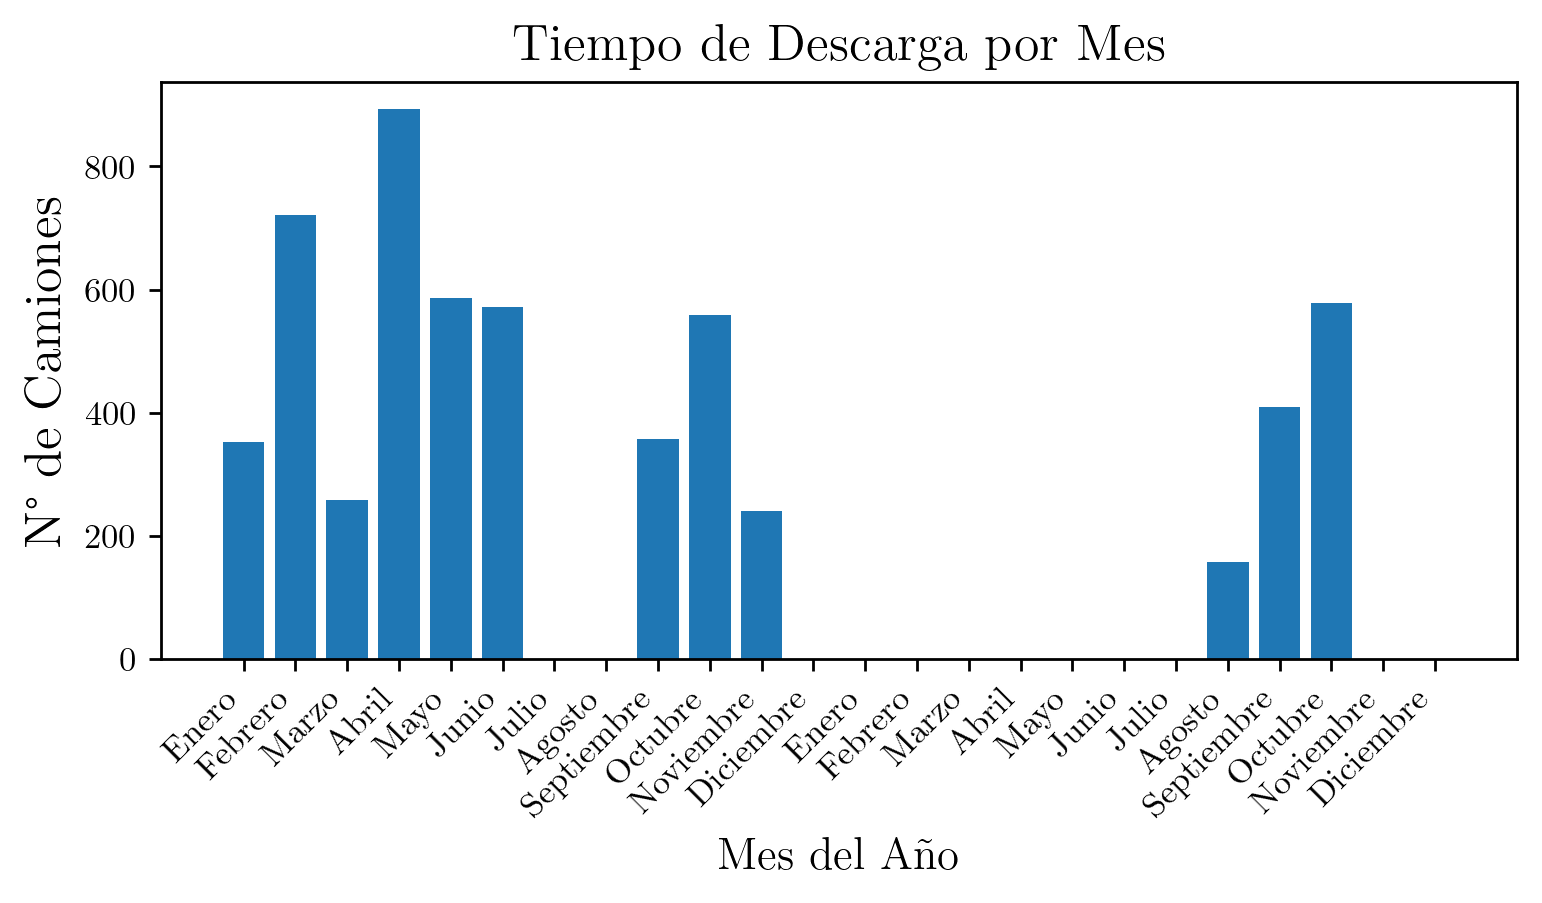

In [83]:
fig = plt.figure(figsize=(7,3), dpi = 250)

ax1 = fig.add_subplot(111)

idx = np.arange(len(meses))
ax1.set_title("Tiempo de Descarga por Mes", fontsize = 15)
ax1.set_ylabel("N° de Camiones", fontsize = 15)
ax1.set_xlabel("Mes del Año", fontsize = 13)
ax1.bar(idx, N_mes, label = "Viajes")
ax1.set_xticks(idx)
ax1.set_xticklabels(meses, rotation = 45, fontsize = 10, 
                    fontdict = {"horizontalalignment": "right"})


plt.show()

In [84]:
T_mes = []
for i in años:
    for j in meses[:12]:
        a = df_ss["Tiempo Total en Puerto"][(df_ss["Año de Descarga"]==i) & (df_ss["Mes de Descarga"]==j)].mean()
        T_mes.append(a)

T_mes = np.nan_to_num(np.array(T_mes))
T_mes 

array([108.3802644 ,  84.7221914 ,  83.05781654, 100.55851064,
        92.52977816, 111.39254079,   0.        ,   0.        ,
       121.67192737, 104.47191413,  88.12618056,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,  50.70031847,
        69.22102689,  79.45322953,   0.        ,   0.        ])

In [85]:
T_mes_pond = (T_mes*N_mes).sum()/N_mes.sum()
T_mes_pond

93.91511846117858

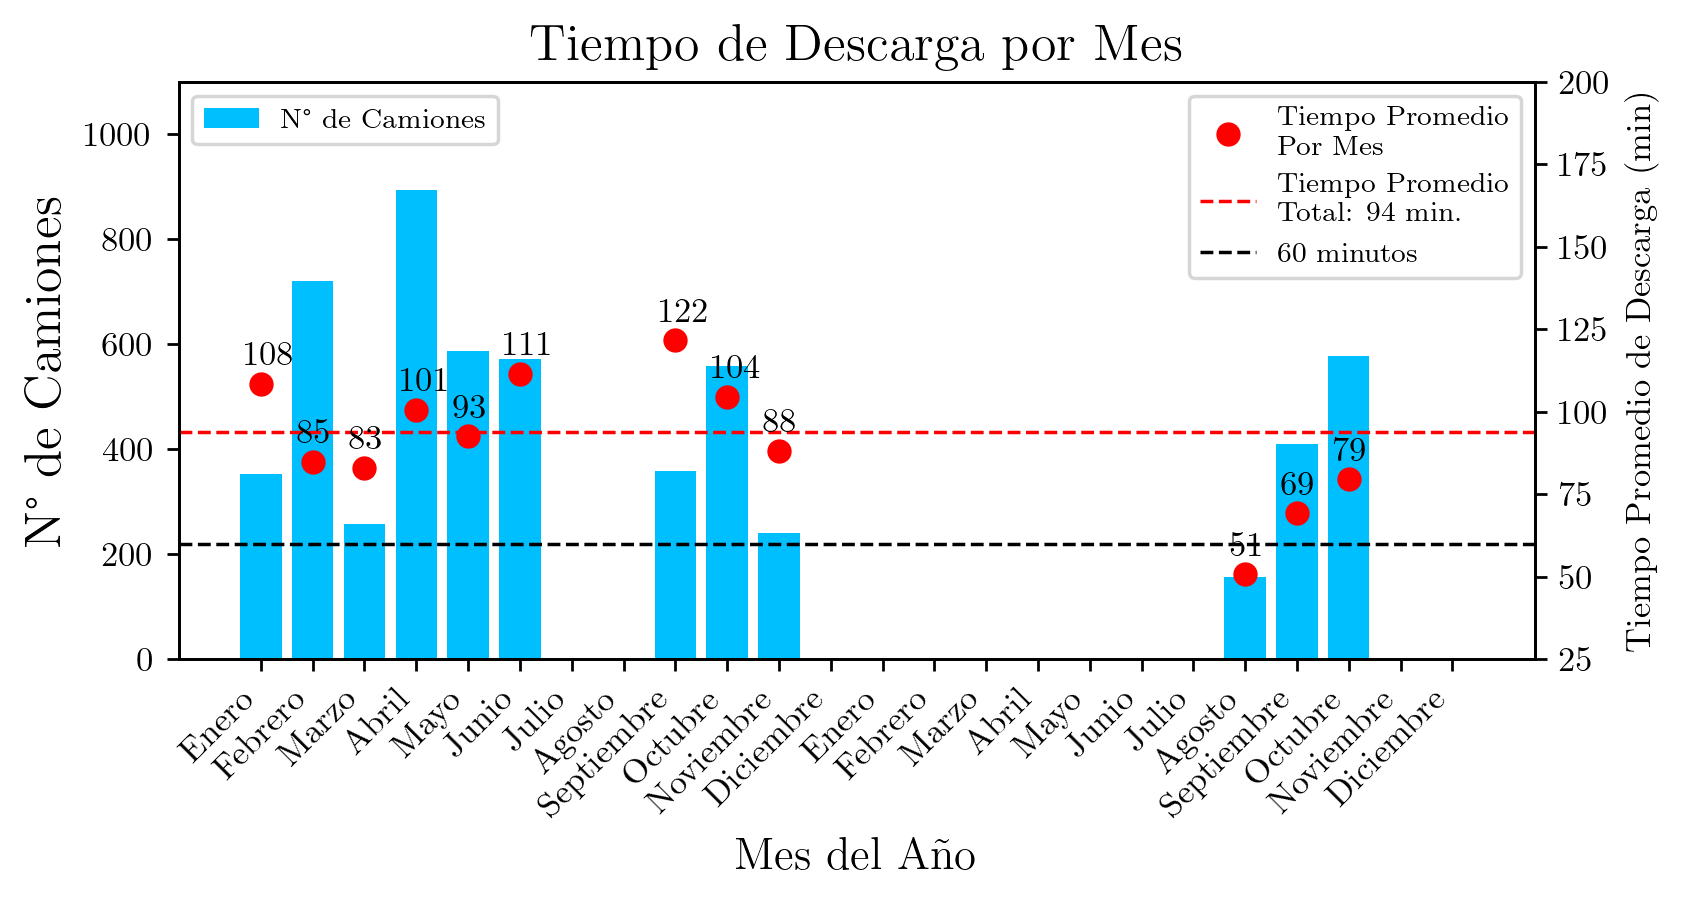

In [86]:
fig = plt.figure(figsize=(7,3), dpi = 250)

ax1 = fig.add_subplot(111)

idx = np.arange(len(meses))
ax1.set_title("Tiempo de Descarga por Mes", fontsize = 15)
ax1.set_ylabel("N° de Camiones", fontsize = 15)
ax1.set_xlabel("Mes del Año", fontsize = 13)
ax1.bar(idx, N_mes, label = "N° de Camiones", color = "deepskyblue")
ax1.set_xticks(idx)
ax1.set_xticklabels(meses, rotation = 45, fontsize = 10, 
                    fontdict = {"horizontalalignment": "right"})
ax1.set_ylim([0,1100])
ax1.legend(fontsize = 8, loc = "upper left")

ax2 = ax1.twinx() 

ax2.plot(idx, T_mes, "ro", label = "Tiempo Promedio \n Por Mes")
ax2.set_ylabel("Tiempo Promedio de Descarga (min)")
ax2.axhline(y = T_mes_pond, c = "r", 
                linestyle = "--", linewidth = 1, 
            label = "Tiempo Promedio \n Total: "+ str(round(T_mes_pond)) + " min.")
ax2.axhline(y = 60., c = "k", 
                linestyle = "--", linewidth = 1, label = "60 minutos")

ax2.set_ylim([25,200])
ax2.legend(fontsize = 8, loc = "upper right")



for i, label in enumerate(T_mes):
    if label != 0:
        plt.annotate(str(round(label)), (i-0.3, T_mes[i]+5.7))


plt.savefig("Graficos/Tiempos de Descarga por Mes.png", bbox_inches= "tight")

plt.show()

In [87]:
T_bloque_1 = (T_mes[:6]*N_mes[:6]).sum()/N_mes[:6].sum()
T_bloque_2 = (T_mes[8:11]*N_mes[8:11]).sum()/N_mes[8:11].sum()
T_bloque_3 = (T_mes[19:22]*N_mes[19:22]).sum()/N_mes[19:22].sum()

In [88]:
T_bloque_1, T_bloque_2, T_bloque_3

(97.10599566459781, 106.40331316623582, 71.84905303030571)

### 6 - Histograma de Tiempos de Espera

In [89]:
df_espera = df_ss[df_ss["Hora Legada a Espera"].notna() & df_ss["Tiempo Espera [minutos]"].notna()]

In [90]:
df_espera.shape

(5679, 8)

In [91]:
import datetime as td
def Minutos_Sobrantes(t):
    if t.time() < td.time(8,30,0):
        t_aux = td.datetime(t.year, t.month, t.day, 8, 30, 0)
        dt = (t_aux - t).total_seconds()/60.
        return dt
    elif t.time() < td.time(14,0,0):
        return 0.
    elif t.time() < td.time(15,30,0):
        t_aux = td.datetime(t.year, t.month, t.day, 15, 30, 0)
        dt = (t_aux - t).total_seconds()/60.
        return dt
    elif t.time() < td.time(22,30,0):
        return 0.
    else:
        t_aux = td.datetime(t.year, t.month, t.day, 8, 30, 0) + td.timedelta(days=1)
        dt = (t_aux - t).total_seconds()/60.
        return dt

In [92]:
df_espera["Hora Legada a Espera"] = pd.to_datetime(df_espera["Hora Legada a Espera"])

<ipython-input-92-d9d185a0ea9e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_espera["Hora Legada a Espera"] = pd.to_datetime(df_espera["Hora Legada a Espera"])


In [93]:
df_espera["Minutos Sobrantes"] = df_espera["Hora Legada a Espera"].apply(lambda x: Minutos_Sobrantes(x))

<ipython-input-93-c9a0c46d32fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_espera["Minutos Sobrantes"] = df_espera["Hora Legada a Espera"].apply(lambda x: Minutos_Sobrantes(x))


In [94]:
df_espera["Tiempo Espera Limpio Aux"] = df_espera["Tiempo Espera [minutos]"] - df_espera["Minutos Sobrantes"]

<ipython-input-94-5d39cea270a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_espera["Tiempo Espera Limpio Aux"] = df_espera["Tiempo Espera [minutos]"] - df_espera["Minutos Sobrantes"]


In [95]:
def Correccion(te, tp):
    dt = (tp-te).total_seconds()/60.
    return dt

In [96]:
df_espera["Tiempo Espera Limpio"] = df_espera.apply(lambda x: x["Tiempo Espera Limpio Aux"] if x["Tiempo Espera Limpio Aux"]>0 else Correccion(x["Hora Legada a Espera"], x["Hora Ingreso a Puerto"]), axis = 1)

<ipython-input-96-a4abe4a0791f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_espera["Tiempo Espera Limpio"] = df_espera.apply(lambda x: x["Tiempo Espera Limpio Aux"] if x["Tiempo Espera Limpio Aux"]>0 else Correccion(x["Hora Legada a Espera"], x["Hora Ingreso a Puerto"]), axis = 1)


In [97]:
T_espera = df_espera["Tiempo Espera Limpio"]
T_espera.max()

1756.9

In [162]:
Bins = [15*i for i in range(17)]
Bins.append(480)
Bins.append(960)
Bins.append(15*118)
h, b = np.histogram(T_espera, bins=Bins)

In [163]:
bins = []
for i in range(len(b[:-5])):
    bins.append(str(round(b[i]))+"-"+str(round(b[i+1])))

bins = np.array(bins + ["225-4h", "4h-8h", "8h-16h", "16h-30h"])
bins

array(['0-15', '15-30', '30-45', '45-60', '60-75', '75-90', '90-105',
       '105-120', '120-135', '135-150', '150-165', '165-180', '180-195',
       '195-210', '210-225', '225-4h', '4h-8h', '8h-16h', '16h-30h'],
      dtype='<U7')

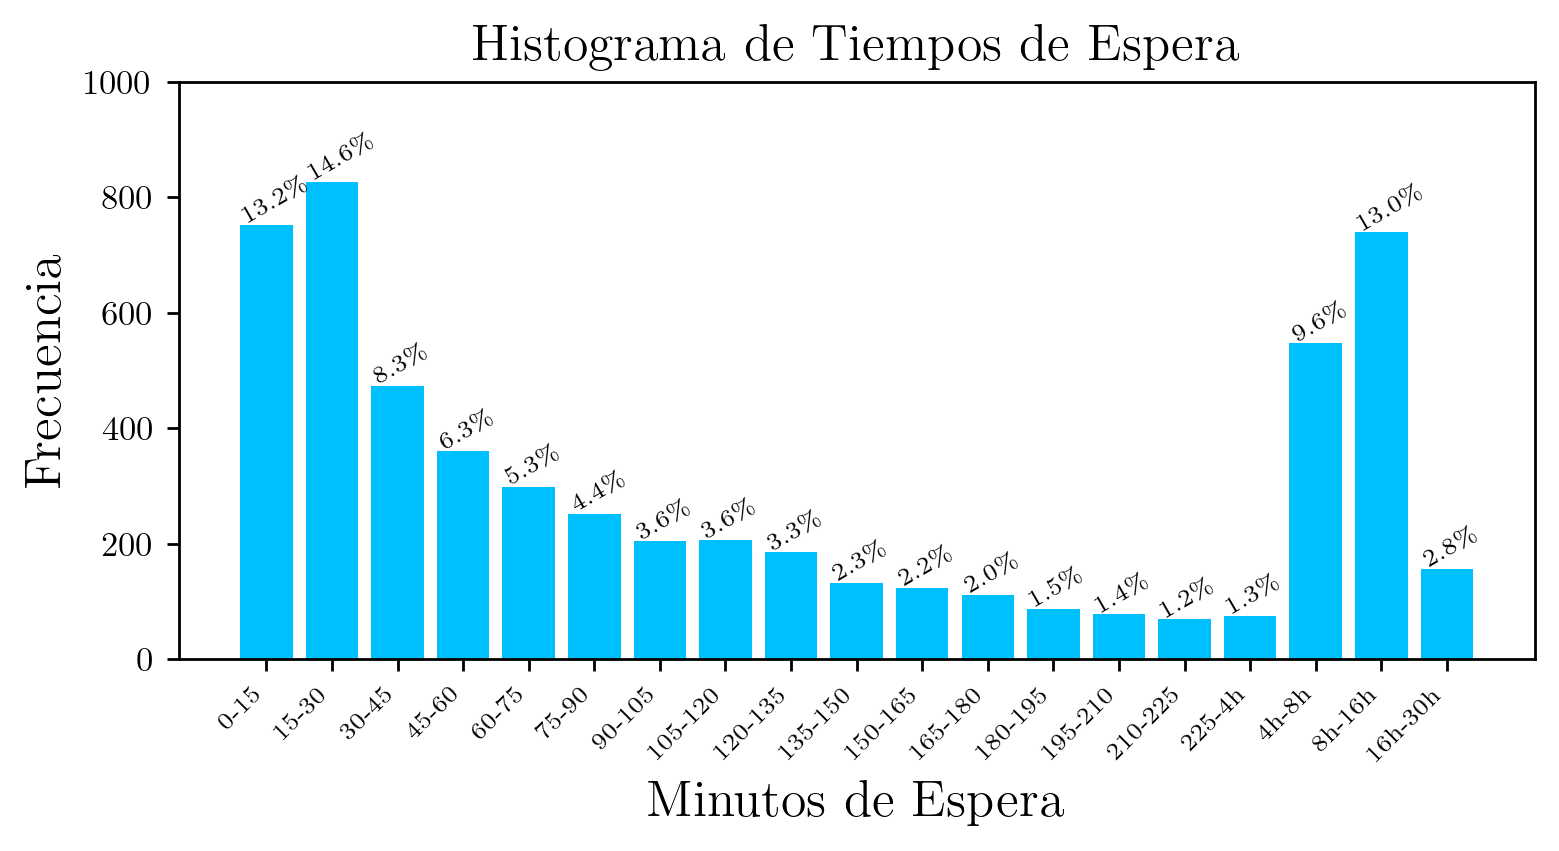

In [164]:
fig = plt.figure(figsize=(7,3), dpi = 250)

ax2 = fig.add_subplot(111)


ax2.bar(bins, h, label = "Tiempo Prom.", color = "deepskyblue" )
ax2.set_title("Histograma de Tiempos de Espera", fontsize = 15)
ax2.set_ylabel("Frecuencia", fontsize = 15)

ax2.set_xticks(bins)
ax2.set_xticklabels(bins, rotation = 45, fontsize = 7, 
                    fontdict = {"horizontalalignment": "right"})
ax2.set_xlabel("Minutos de Espera", fontsize = 15)
ax2.set_ylim([0,1000])

perc = 100*h/h.sum()
for i, label in enumerate(perc):
    #if label > 0.1:
        plt.annotate(str(round(label,1)) + "\%", (i-0.4, h[i]+2.5), 
                     fontsize = 7, rotation = 30)

plt.savefig("Graficos/Histograma de Tiempos de Espera.png", bbox_inches= "tight")

In [169]:
bins_mid = [(Bins[i] + Bins[i+1])/2 for i in range(len(Bins)-1)]
bins_mid = np.array(bins_mid)

In [181]:
((bins_mid[4:] - 60.)*h[4:]).sum()/60.

16286.375

### 7 - Tiempos de Espera Promedio Segun Hora de Llegada

In [101]:
df_clean = df_espera

In [102]:
df_clean.shape

(5679, 11)

In [104]:
df_clean["Rango Horario en Espera"] = df_clean["Hora Legada a Espera"].apply(lambda x: str(x.hour)+"-"+str(x.hour+1))

<ipython-input-104-9357ba486778>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Rango Horario en Espera"] = df_clean["Hora Legada a Espera"].apply(lambda x: str(x.hour)+"-"+str(x.hour+1))


In [110]:
rangos = [str(i)+"-"+str(i+1) for i in range(24)] 

In [111]:
N_rangos = np.array([df_clean[df_clean["Rango Horario en Espera"] == i].shape[0] for i in rangos])

In [112]:
T_rangos = np.array([df_clean["Tiempo Espera Limpio"][df_clean["Rango Horario en Espera"] == i].mean() for i in rangos])

In [113]:
T_rangos = np.nan_to_num(T_rangos)
T_rangos

array([153.06380471, 190.45777778, 166.40333333, 225.32222222,
       155.65      ,  36.15833333, 173.28547009, 110.81604938,
       158.65597222, 134.31512864, 159.6021412 , 161.80702443,
       151.3289794 , 143.46007326, 106.64577836, 149.31235955,
       173.07156398, 177.81926407, 156.88333333, 257.4491106 ,
       352.19480198, 618.75076503, 500.53123249, 139.93019943])

In [114]:
T_rangos_pond = (T_rangos*N_rangos).sum()/N_rangos.sum()

In [115]:
idx = []
T_rang = []
for i, val in enumerate(T_rangos):
    if val != 0:
        idx.append(i)
        T_rang.append(val)
T_rang = np.array(T_rang)
T_rang

array([153.06380471, 190.45777778, 166.40333333, 225.32222222,
       155.65      ,  36.15833333, 173.28547009, 110.81604938,
       158.65597222, 134.31512864, 159.6021412 , 161.80702443,
       151.3289794 , 143.46007326, 106.64577836, 149.31235955,
       173.07156398, 177.81926407, 156.88333333, 257.4491106 ,
       352.19480198, 618.75076503, 500.53123249, 139.93019943])

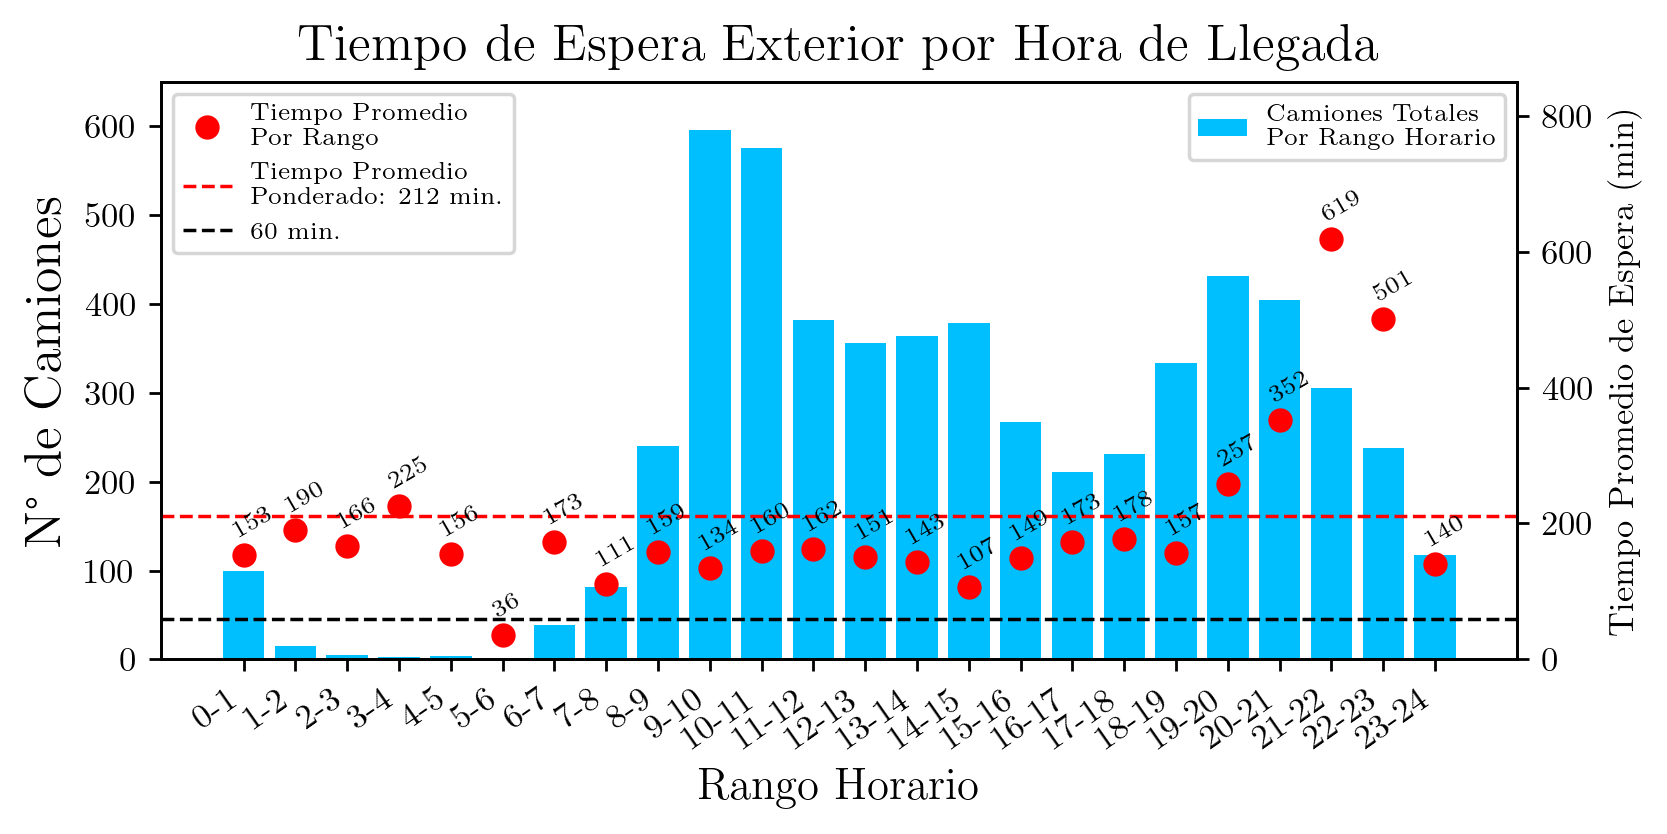

In [117]:
fig = plt.figure(figsize=(7,3), dpi = 250)

ax1 = fig.add_subplot(111)


ax1.bar(rangos, N_rangos, label = "Camiones Totales \n Por Rango Horario", color = "deepskyblue")
ax1.set_title("Tiempo de Espera Exterior por Hora de Llegada", fontsize = 15)
ax1.set_ylabel("N° de Camiones", fontsize = 15)
ax1.set_xlabel("Rango Horario", fontsize = 13)
ax1.legend(loc = "upper right",fontsize = 7)
ax1.set_xticks(rangos)
ax1.set_xticklabels(rangos, rotation = 35, fontdict = {"horizontalalignment": "right"})

ax1.set_ylim([0,650])
#ax2.legend(fontsize = 7)



ax2 = ax1.twinx() 

ax2.plot(idx, T_rang, "ro", label = "Tiempo Promedio \n Por Rango")
ax2.set_ylabel("Tiempo Promedio de Espera (min)", fontsize = 10)
ax2.axhline(y = T_rangos_pond, c = "r", 
                linestyle = "--", linewidth = 1, 
            label = "Tiempo Promedio \n Ponderado: "+ str(round(T_rangos_pond)) + " min.")
ax2.axhline(y = 60., c = "k", 
                linestyle = "--", linewidth = 1, label = "60 min.")

ax2.set_ylim([0,850])
ax2.legend(loc = "upper left",fontsize = 7)



for i, label in enumerate(T_rangos):
    if label != 0:
        plt.annotate(str(round(label)), (i-0.25, label+25.9), fontsize = 7, rotation = 30)
    
plt.savefig("Graficos/Tiempos de Espera Por Hora de LLegada.png", bbox_inches= "tight")

### 8 - Camiones En Espera Promedio Por Rango Horario

In [118]:
df_clean["Fecha de Ingreso a Espera"] = df_clean["Hora Legada a Espera"].apply(lambda x: x.date())

<ipython-input-118-865edbdc0d32>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Fecha de Ingreso a Espera"] = df_clean["Hora Legada a Espera"].apply(lambda x: x.date())


In [119]:
fechas_espera = df_clean["Fecha de Ingreso a Espera"].unique()

In [120]:
rang_mean = [[] for i in rangos]
for i, vali in enumerate(rangos):
    for j, valj in enumerate(fechas_espera):
        a = df_clean[(df_clean["Fecha de Ingreso a Espera"] == valj) &
                    (df_clean["Rango Horario en Espera"] == vali)].shape[0]
        
        rang_mean[i].append(a)
        
len(rang_mean), len(rangos)

(24, 24)

In [121]:
rango_prom = [np.array(i).mean() for i in rang_mean]
rango_max = [np.array(i).max() for i in rang_mean]

In [122]:
idx = []
rango_prom_aux = []
for i, val in enumerate(rango_prom):
    if val != 0:
        idx.append(i)
        rango_prom_aux.append(val)
rango_prom_aux = np.array(rango_prom_aux)
rango_prom_aux

array([0.42307692, 0.06410256, 0.02136752, 0.01282051, 0.01709402,
       0.00854701, 0.16666667, 0.34615385, 1.02564103, 2.54700855,
       2.46153846, 1.63247863, 1.52136752, 1.55555556, 1.61965812,
       1.14102564, 0.9017094 , 0.98717949, 1.42735043, 1.84188034,
       1.72649573, 1.3034188 , 1.01709402, 0.5       ])

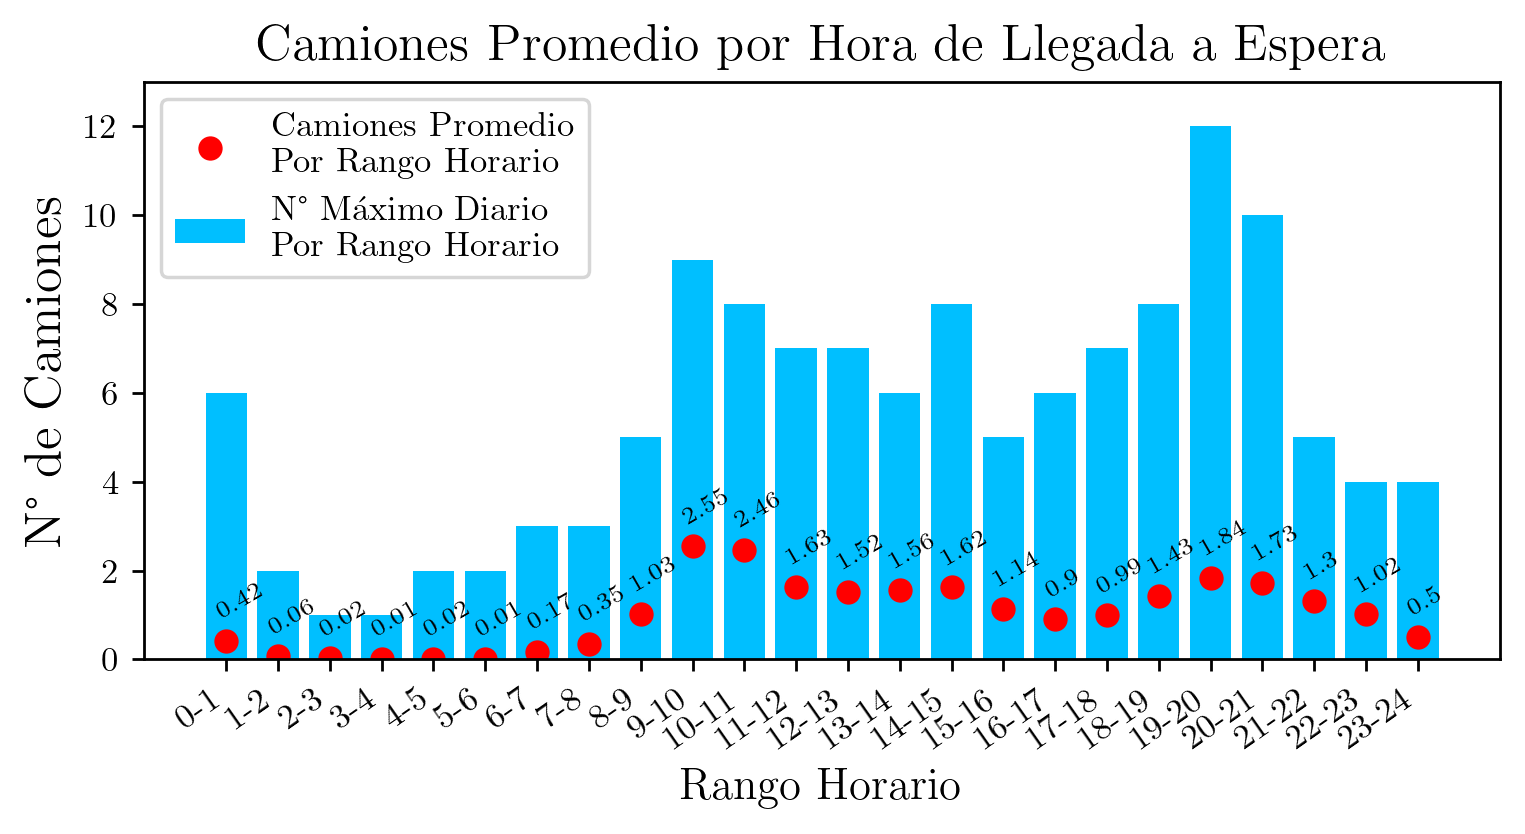

In [123]:
fig = plt.figure(figsize=(7,3), dpi = 250)

ax1 = fig.add_subplot(111)


ax1.bar(rangos, rango_max, label = "N° Máximo Diario \n Por Rango Horario", color = "deepskyblue")
ax1.set_title("Camiones Promedio por Hora de Llegada a Espera", fontsize = 15)
ax1.set_ylabel("N° de Camiones", fontsize = 15)
ax1.set_xlabel("Rango Horario", fontsize = 13)
ax1.set_xticks(rangos)
ax1.set_xticklabels(rangos, rotation = 35, fontdict = {"horizontalalignment": "right"})

ax1.set_ylim([0,13])
#ax2.legend(fontsize = 7)


ax1.plot(idx, rango_prom_aux, "ro", label = "Camiones Promedio \n Por Rango Horario")
ax1.legend(loc = "upper left",fontsize = 10)
#ax2.legend(loc = "upper left",fontsize = 7)


for i, label in enumerate(rango_prom):
    if label != 0:
        plt.annotate(str(round(label,2)), (i-0.25, label+0.5), fontsize = 7, rotation = 30)
    
plt.savefig("Graficos/Camiones Promedio en Espera Por Rango Horario.png", bbox_inches= "tight")

### Tiempos de Espera Limpios Por Mes

In [125]:
T_mes_clean = []
for i in años:
    for j in meses[:12]:
        a = df_clean["Tiempo Espera Limpio"][(df_clean["Año de Descarga"]==i) & (df_clean["Mes de Descarga"]==j)].mean()
        T_mes_clean.append(a)

T_mes_clean = np.nan_to_num(np.array(T_mes_clean))
T_mes_clean

array([195.05577652, 154.60977809, 144.39102067, 222.31148522,
       168.24037037, 134.29198718,   0.        ,   0.        ,
       290.75353818, 203.96663685, 330.24958333,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        , 327.94246284,
       279.92917685, 255.81796649,   0.        ,   0.        ])

In [126]:
df_clean["Año de Espera"] = df_clean["Hora Legada a Espera"].apply(lambda x: x.year)
df_clean["Mes de Espera"] = df_clean["Hora Legada a Espera"].apply(lambda x: Mes(x))

<ipython-input-126-611461df21c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Año de Espera"] = df_clean["Hora Legada a Espera"].apply(lambda x: x.year)
<ipython-input-126-611461df21c6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Mes de Espera"] = df_clean["Hora Legada a Espera"].apply(lambda x: Mes(x))


In [127]:
N_mes_clean = []
for i in años:
    for j in meses[:12]:
        a = df_clean[(df_clean["Año de Espera"]==i) & (df_clean["Mes de Espera"]==j)].shape[0]
        N_mes_clean.append(a)

N_mes_clean = np.array(N_mes_clean)
N_mes_clean

array([353, 724, 255, 890, 600, 557,   0,   0, 365, 561, 231,   0,   0,
         0,   0,   0,   0,   0,   0, 160, 418, 565,   0,   0])

In [128]:
T_clean_pond = (T_mes_clean*N_mes_clean).sum()/N_mes_clean.sum()
T_clean_pond

211.66935713175064

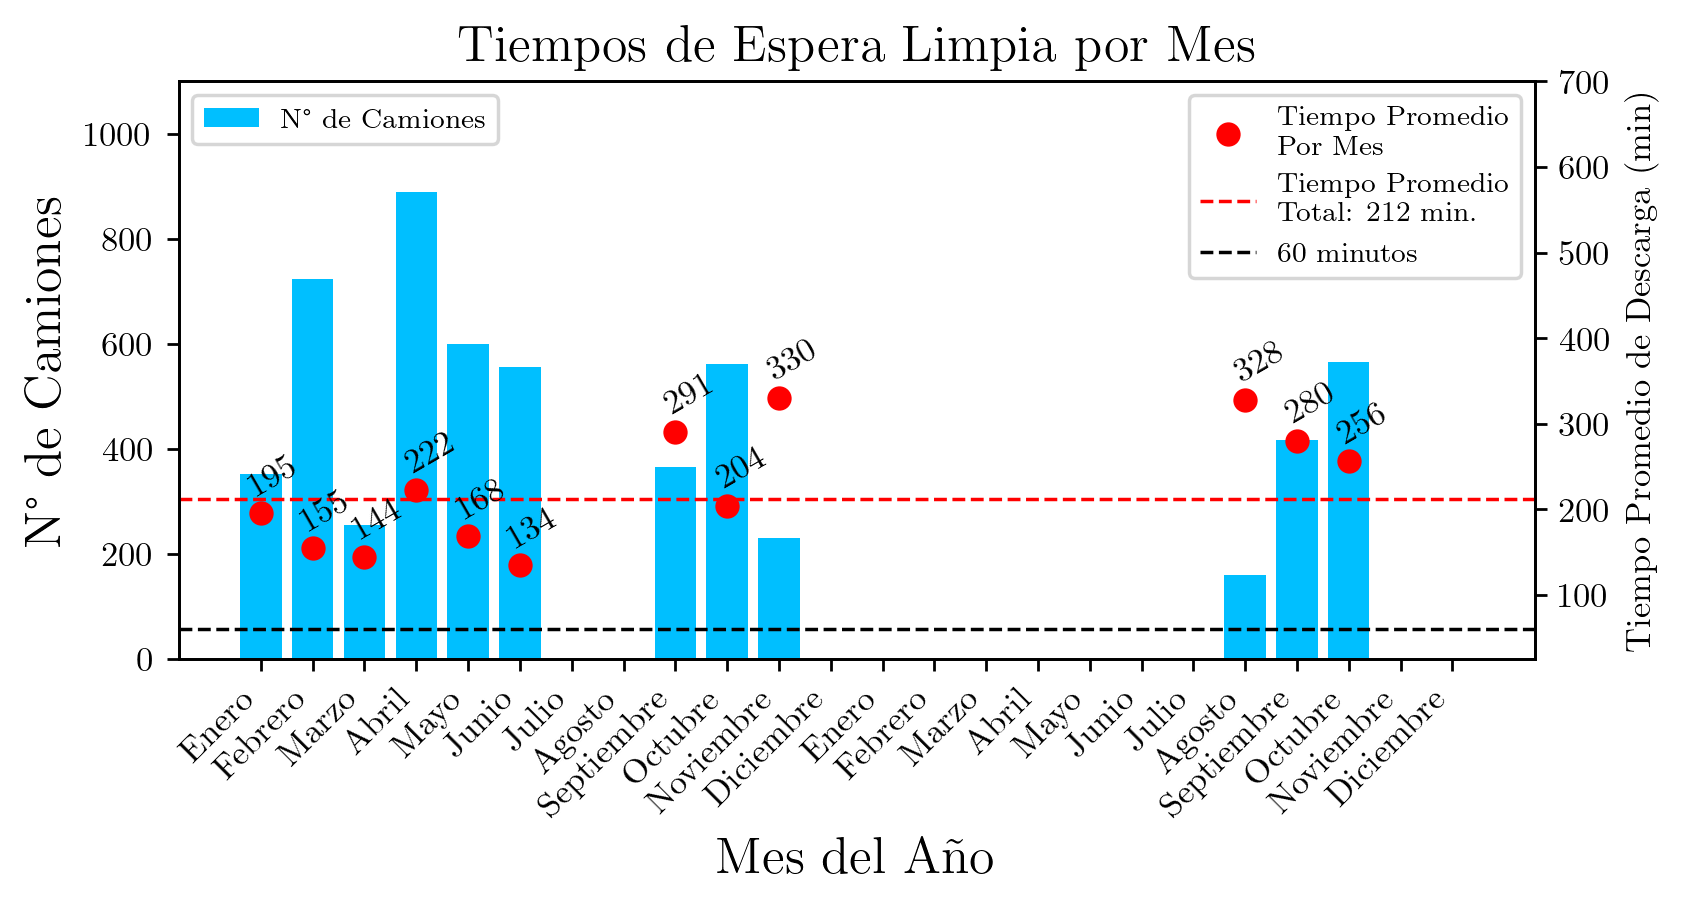

In [129]:
fig = plt.figure(figsize=(7,3), dpi = 250)

ax1 = fig.add_subplot(111)

idx = np.arange(len(meses))
ax1.set_title("Tiempos de Espera Limpia por Mes", fontsize = 15)
ax1.set_ylabel("N° de Camiones", fontsize = 15)
ax1.set_xlabel("Mes del Año", fontsize = 15)
ax1.bar(idx, N_mes_clean, label = "N° de Camiones", color = "deepskyblue")
ax1.set_xticks(idx)
ax1.set_xticklabels(meses, rotation = 45, fontsize = 10, 
                    fontdict = {"horizontalalignment": "right"})
ax1.set_ylim([0,1100])
ax1.legend(fontsize = 8, loc = "upper left")

ax2 = ax1.twinx() 

ax2.plot(idx, T_mes_clean, "ro", label = "Tiempo Promedio \n Por Mes")
ax2.set_ylabel("Tiempo Promedio de Descarga (min)")
ax2.axhline(y = T_clean_pond, c = "r", 
                linestyle = "--", linewidth = 1, 
            label = "Tiempo Promedio \n Total: "+ str(round(T_clean_pond)) + " min.")
ax2.axhline(y = 60., c = "k", 
                linestyle = "--", linewidth = 1, label = "60 minutos")

ax2.set_ylim([25,700])
ax2.legend(fontsize = 8, loc = "upper right")



for i, label in enumerate(T_mes_clean):
    if label != 0:
        plt.annotate(str(round(label)), (i-0.3, label+20.7), rotation=30)


plt.savefig("Graficos/Tiempos de Espera Limpia por Mes.png", bbox_inches= "tight")

plt.show()

### Cálculos Esperas Limpias Sobre 60 min

In [130]:
N_esp_2020 = df_clean[(df_clean["Tiempo Espera Limpio"]>60) & (df_clean["Año de Espera"]==2020)].shape[0]
N_esp_2021 = df_clean[(df_clean["Tiempo Espera Limpio"]>60) & (df_clean["Año de Espera"]==2021)].shape[0]
N_esp_2020, N_esp_2021

(2376, 889)

In [131]:
N_esp_2020 + N_esp_2021

3265

In [132]:
N_clean_2020 = df_clean[(df_clean["Año de Espera"]==2020)].shape[0]
N_clean_2021 = df_clean[(df_clean["Año de Espera"]==2021)].shape[0]
N_clean_2020, N_clean_2021, N_clean_2020 + N_clean_2021

(4536, 1143, 5679)

In [133]:
N_clean = df_clean.shape[0]
N_clean

5679

In [134]:
100*N_esp_2020/N_clean_2020

52.38095238095238

In [135]:
100*N_esp_2021/N_clean_2021

77.77777777777777

In [136]:
100*(N_esp_2020 + N_esp_2021)/N_clean

57.49251628807889

In [137]:
df_clean["Minutos Espera Sobre 60 min"] = df_clean["Tiempo Espera Limpio"].apply(lambda x: x-60 if x-60>0 else 0)

<ipython-input-137-8c5caf00567a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Minutos Espera Sobre 60 min"] = df_clean["Tiempo Espera Limpio"].apply(lambda x: x-60 if x-60>0 else 0)


In [138]:
T_perdido_2020 = df_clean["Minutos Espera Sobre 60 min"][df_clean["Año de Espera"]==2020].sum()/60.
T_perdido_2021 = df_clean["Minutos Espera Sobre 60 min"][df_clean["Año de Espera"]==2021].sum()/60.
T_perdido_2020, T_perdido_2021, T_perdido_2020 + T_perdido_2021

(11545.164166665947, 4179.807222221489, 15724.971388887436)

<AxesSubplot:>

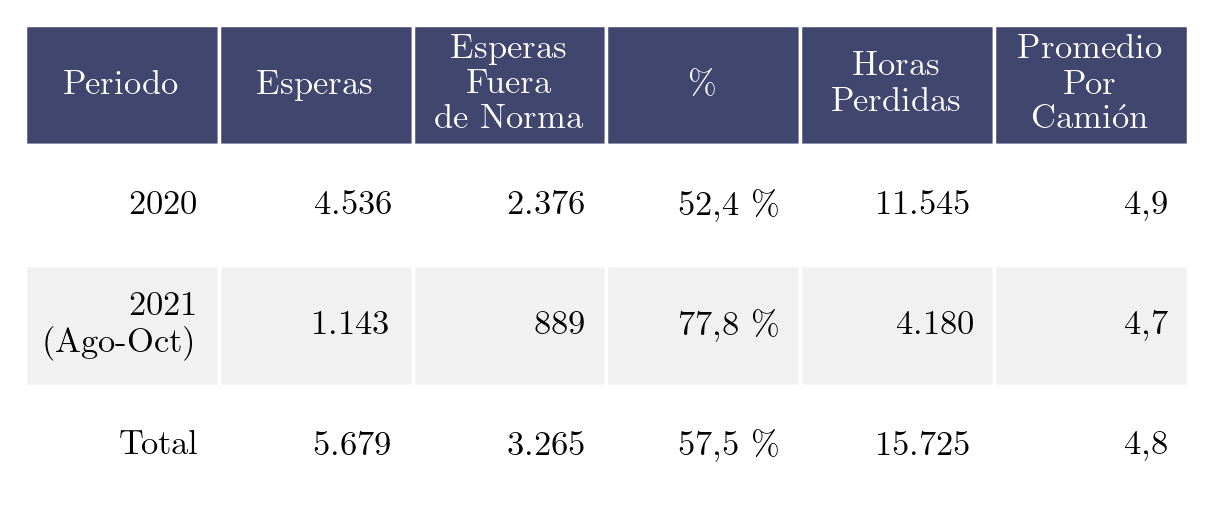

In [160]:
import six

tabla = pd.DataFrame()
tabla['Periodo'] = ['2020', '2021 \n (Ago-Oct)', 'Total']
tabla['Esperas'] = ["4.536", "1.143", "5.679"]
tabla['Esperas \n Fuera \n de Norma'] = ["2.376", "889", "3.265"]
tabla['\%'] = ["52,4 \%", "77,8 \%", "57,5 \%"]
tabla['Horas \n Perdidas'] = ["11.545", "4.180", "15.725"]
tabla['Promedio \n Por \n Camión'] = ["4,9", "4,7", "4,8"]


def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=10,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], Edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, image=False,**kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size, dpi = 250)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(Edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    if image==True:        
        plt.savefig("Graficos/Tabla de Esperas Limpias.png", bbox_inches= "tight")
    return ax

render_mpl_table(tabla, header_columns=0, col_width=1.0, image=True)

### Calculo Espera Total Sobre 75 min

In [139]:
df_clean["Tiempo Total"] = df_clean["Tiempo Espera Limpio"] + df_clean["Tiempo Total en Puerto"]

<ipython-input-139-e428ee2fef3b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Tiempo Total"] = df_clean["Tiempo Espera Limpio"] + df_clean["Tiempo Total en Puerto"]


In [140]:
N_sobre_75 = df_clean[df_clean["Tiempo Total"]>75].shape[0]

In [141]:
N_total = df_clean.shape[0]

In [142]:
N_total, N_sobre_75, N_total-N_sobre_75

(5679, 4714, 965)

In [143]:
100*N_sobre_75/N_total

83.00757175559077

In [144]:
df_clean["Minutos Totales Sobre 75 min"] = df_clean["Tiempo Total"].apply(lambda x: x-75 if x-75>0 else 0)

<ipython-input-144-ba0f06e28dd7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Minutos Totales Sobre 75 min"] = df_clean["Tiempo Total"].apply(lambda x: x-75 if x-75>0 else 0)


In [209]:
df_clean["Minutos Totales Sobre 75 min"].sum()/(60.*9*365*2)

3.3775774987314033

In [210]:
5679/(365*2)

7.779452054794521

In [203]:
df_clean["Minutos Totales Sobre 75 min"][df_clean["Minutos Totales Sobre 75 min"]!=0].sum()/60.

22190.684166665316

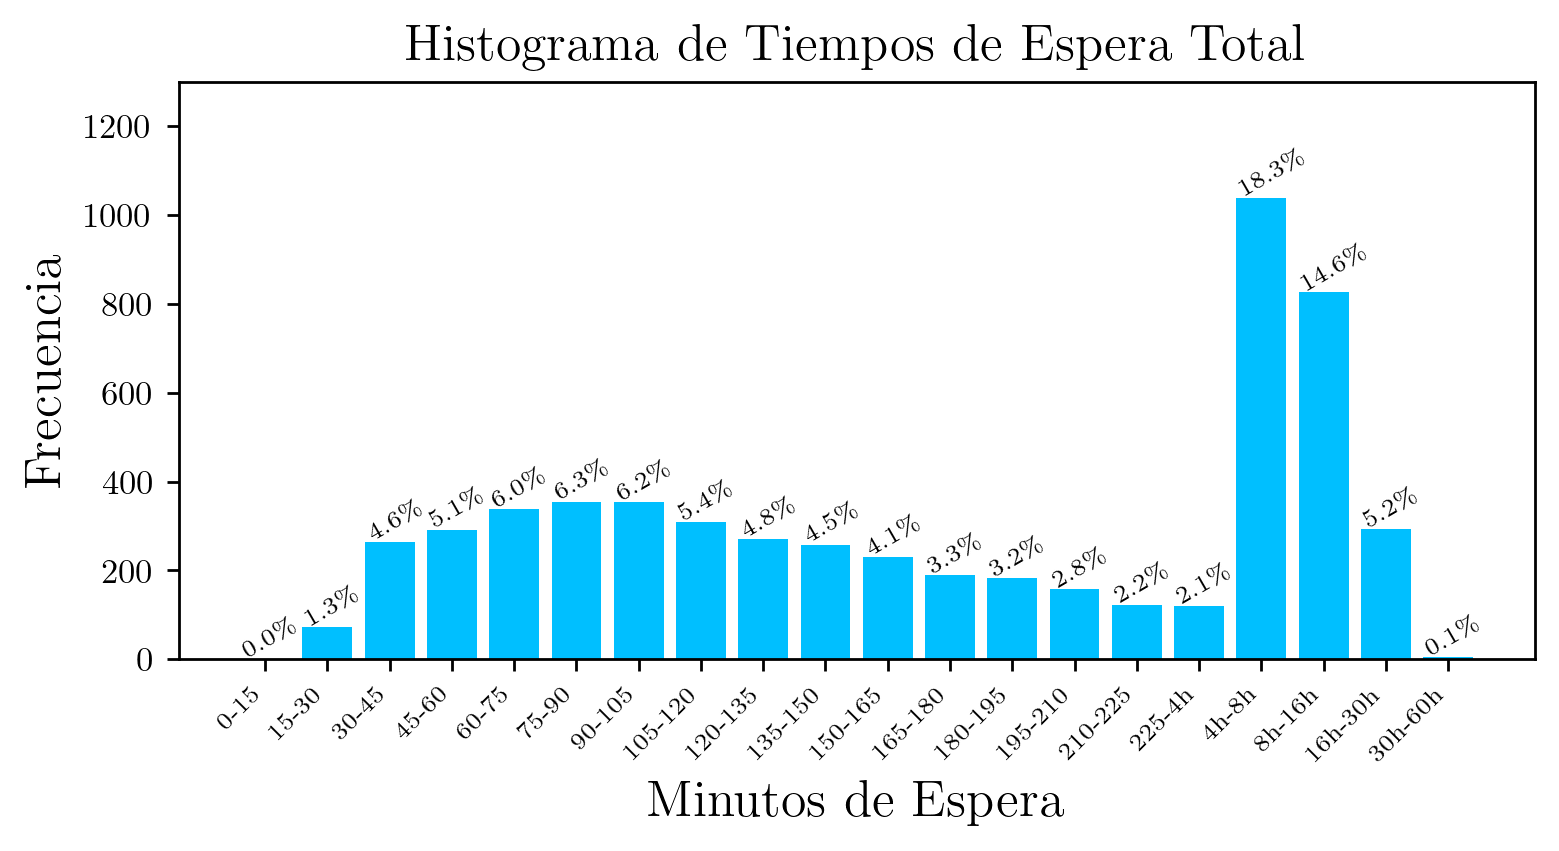

In [199]:
T_total = df_clean["Tiempo Total"]

Bins = [15*i for i in range(17)]
Bins.append(480)
Bins.append(960)
Bins.append(15*118)
Bins.append(30*118)
h, b = np.histogram(T_total, bins=Bins)


bins = []
for i in range(len(b[:-6])):
    bins.append(str(round(b[i]))+"-"+str(round(b[i+1])))

bins = np.array(bins + ["225-4h", "4h-8h", "8h-16h", "16h-30h", "30h-60h"])


fig = plt.figure(figsize=(7,3), dpi = 250)

ax2 = fig.add_subplot(111)


ax2.bar(bins, h, label = "Tiempo Prom.", color = "deepskyblue" )
ax2.set_title("Histograma de Tiempos de Espera Total", fontsize = 15)
ax2.set_ylabel("Frecuencia", fontsize = 15)

ax2.set_xticks(bins)
ax2.set_xticklabels(bins, rotation = 45, fontsize = 7, 
                    fontdict = {"horizontalalignment": "right"})
ax2.set_xlabel("Minutos de Espera", fontsize = 15)
ax2.set_ylim([0,1300])

perc = 100*h/h.sum()
for i, label in enumerate(perc):
    #if label > 0.1:
        plt.annotate(str(round(label,1)) + "\%", (i-0.4, h[i]+2.5), 
                     fontsize = 7, rotation = 30)

#plt.savefig("Graficos/Histograma de Tiempos de Espera.png", bbox_inches= "tight")

In [185]:
Bins

[0,
 15,
 30,
 45,
 60,
 75,
 90,
 105,
 120,
 135,
 150,
 165,
 180,
 195,
 210,
 225,
 240,
 480,
 960,
 1770,
 3540]

5679